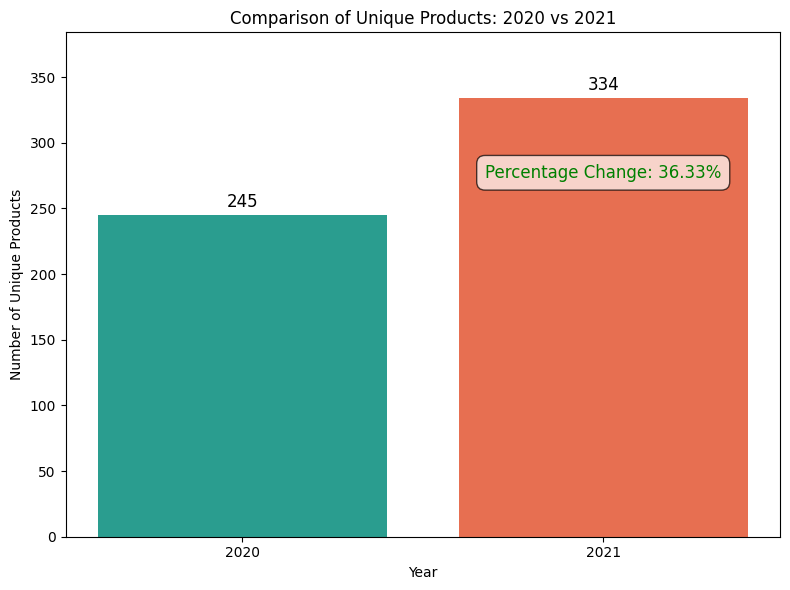

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('out2.csv')

# Extract data for plotting
years = ['2020', '2021']
products = [df['unique_products_2020'].iloc[0], df['unique_products_2021'].iloc[0]]
percentage_change = df['percentage_chg'].iloc[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(years, products, color=['#2a9d8f', '#e76f51'])

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12,
    )

# Add an annotation for the percentage change
ax.text(
    1,
    products[1] - 50,
    f'Percentage Change: {percentage_change:.2f}%',
    ha='center',
    va='top',
    fontsize=12,
    color='green',
    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7),
)

# Set title and labels
ax.set_title('Comparison of Unique Products: 2020 vs 2021')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Products')

plt.ylim(0, max(products) * 1.15)
plt.tight_layout()

# Display the chart
plt.show()


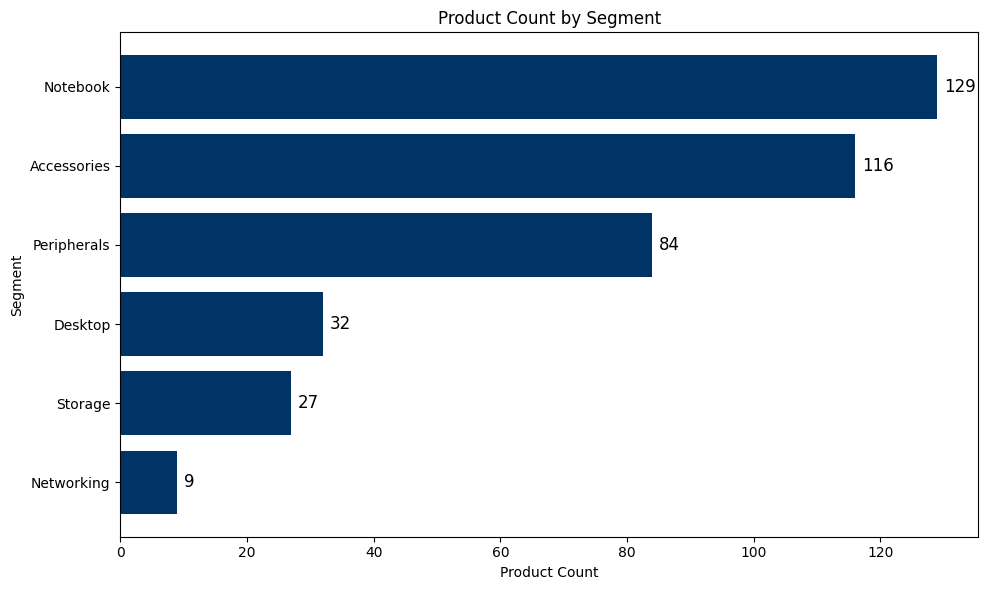

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('out3.csv')

# Sort the data by product_count for better readability
df_sorted = df.sort_values('product_count', ascending=True)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_sorted['segment'], df_sorted['product_count'], color='#003366')

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.annotate(
        f'{width}',
        xy=(width, bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),  # 5 points horizontal offset
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=12,
    )

# Set labels and title
ax.set_title('Product Count by Segment')
ax.set_xlabel('Product Count')
ax.set_ylabel('Segment')

# Adjust plot layout
plt.tight_layout()

# Display the chart
plt.show()



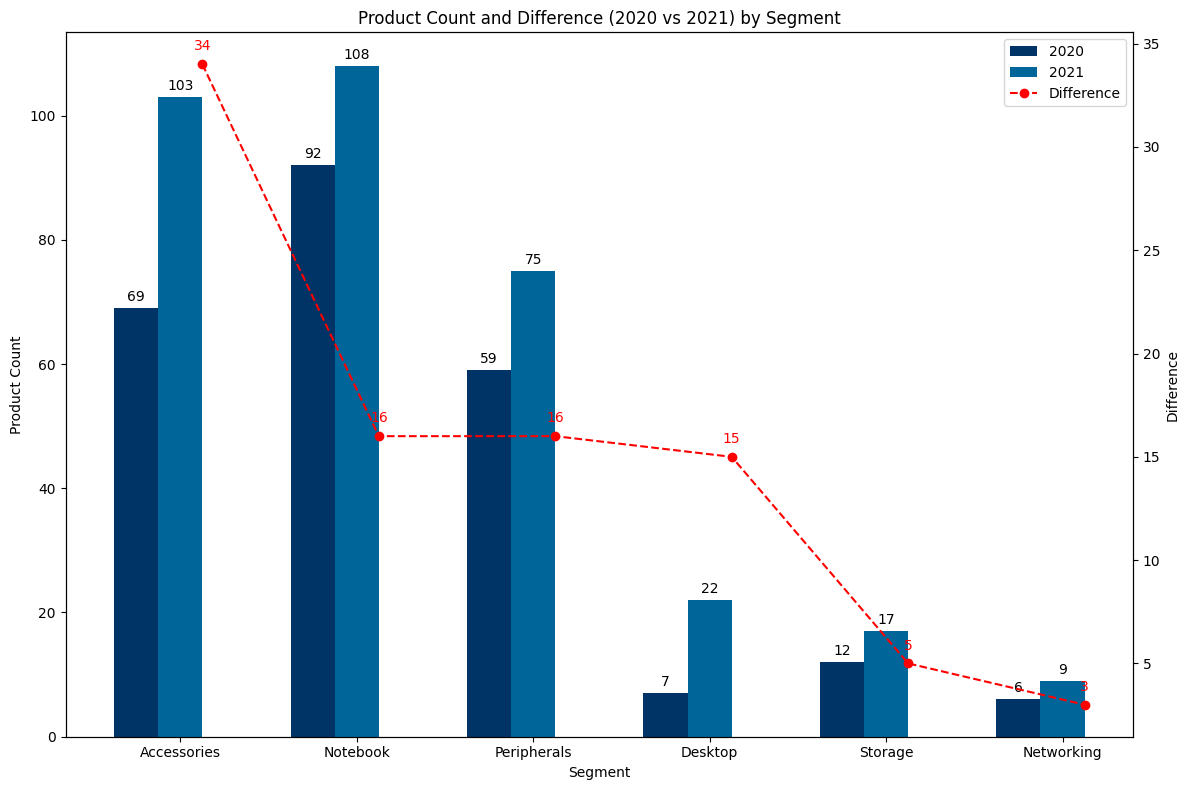

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('out4.csv')

# Sort the data by 'Difference' for better readability
df_sorted = df.sort_values('Difference', ascending=False)

# Set the positions and width for the bars
x = np.arange(len(df_sorted['segment']))
width = 0.25

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for 2020 and 2021
bars1 = ax.bar(x - width, df_sorted['product_count_2020'], width, label='2020', color='#003366')
bars2 = ax.bar(x, df_sorted['product_count_2021'], width, label='2021', color='#006699')

# Create a line plot for the difference
ax2 = ax.twinx()
line = ax2.plot(x + width / 2, df_sorted['Difference'], color='red', marker='o', linestyle='--', label='Difference')

# Add data labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
        )

add_labels(bars1)
add_labels(bars2)

# Add data labels to the line plot
for i, txt in enumerate(df_sorted['Difference']):
    ax2.annotate(
        f'{txt}',
        (x[i] + width / 2, df_sorted['Difference'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        color='red',
    )

# Set labels and title
ax.set_title('Product Count and Difference (2020 vs 2021) by Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Product Count')
ax2.set_ylabel('Difference')

ax.set_xticks(x)
ax.set_xticklabels(df_sorted['segment'])
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

# Combine legends from both axes
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper right')

# Display the chart
plt.show()



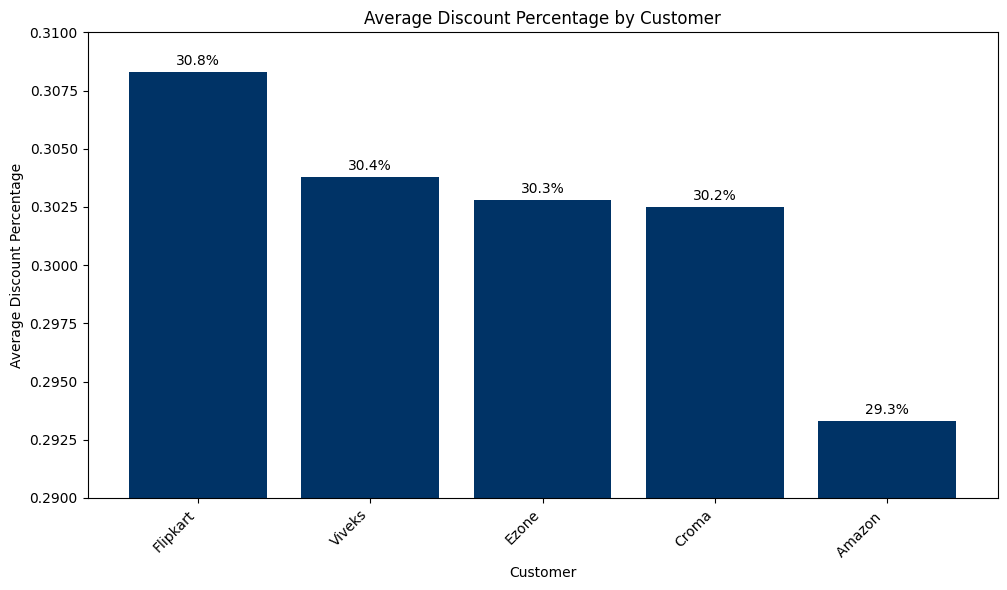

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('out6.csv')

# Sort the data by percentage for better visualization
df_sorted = df.sort_values(by='average_discount_percentage', ascending=False)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.bar(df_sorted['customer'], df_sorted['average_discount_percentage'], color='#003366')

# Add data labels, converting the percentage to a proper format
for bar in bars:
    height = bar.get_height()
    percentage = f'{height * 100:.1f}%'
    ax.annotate(
        percentage,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords='offset points',
        ha='center',
        va='bottom',
    )

# Set labels and title
ax.set_title('Average Discount Percentage by Customer')
ax.set_xlabel('Customer')
ax.set_ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Set y-axis limits to show a more significant difference
# Adjusting this range will exaggerate the visual differences
plt.ylim(0.29, 0.31)

# Display the chart
plt.show()



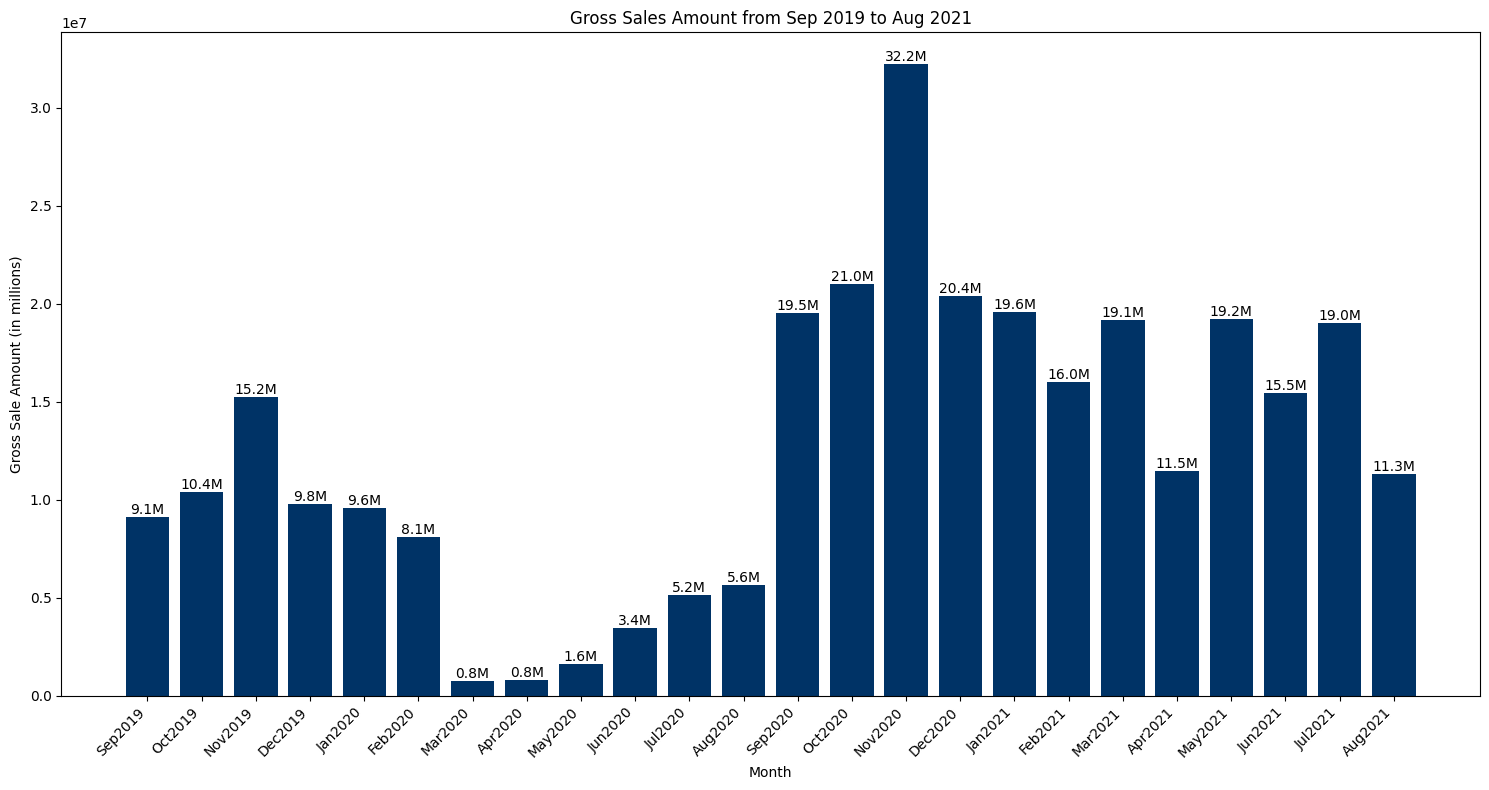

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('out7.csv')

# Convert the 'month' column to datetime objects
df['month_formatted'] = pd.to_datetime(df['month'], format='%B(%Y)')

# Sort the DataFrame by the new datetime column
df = df.sort_values(by='month_formatted')

# Create a new column with the desired 'mmmyyyy' format
df['month_label'] = df['month_formatted'].dt.strftime('%b%Y')

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the bar plot with a dark navy blue color
bars = plt.bar(df['month_label'], df['gross_sale_amount'], color='#003366')

# Add data labels, formatting them in millions
for bar in bars:
    yval = bar.get_height()
    label = f'{yval/1000000:.1f}M'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, label, ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.title('Gross Sales Amount from Sep 2019 to Aug 2021')
plt.xlabel('Month')
plt.ylabel('Gross Sale Amount (in millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


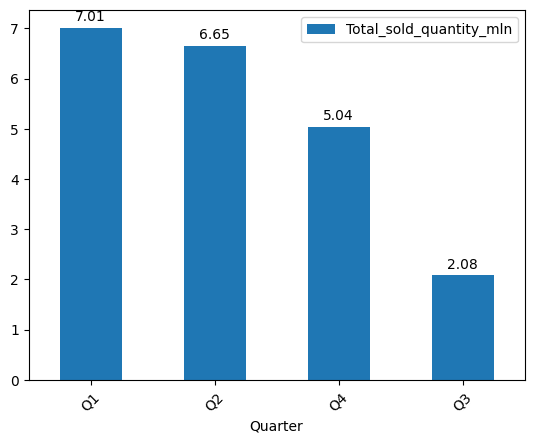

In [111]:
import pandas as pd
df = pd.read_csv('out8.csv' )
ax=df.plot(kind= 'bar' , x='Quarter')
for container in ax.containers:
	ax.bar_label (container, padding=3)
plt.xticks(rotation=45)
plt.show() 


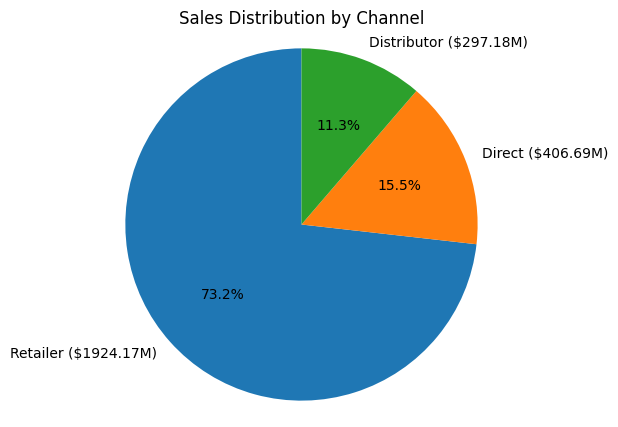

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('out9.csv')

# Create a new column for labels that combines the channel and gross sales
df['combined_labels'] = df.apply(
    lambda row: f"{row['channel']} (${row['gross_sales_mln']:.2f}M)", axis=1
    )
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    df['percentage'],
    labels=df['combined_labels'],
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_title('Sales Distribution by Channel')
ax.axis('equal')
plt.show()

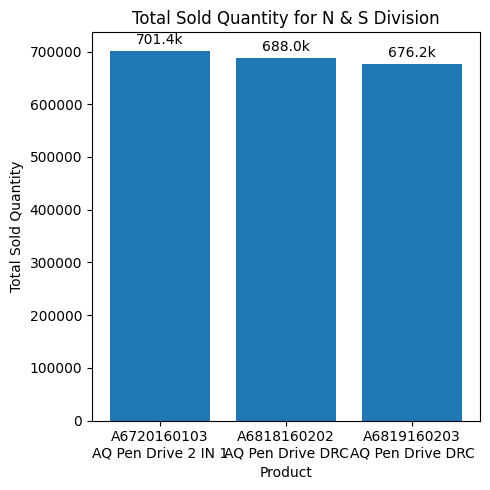

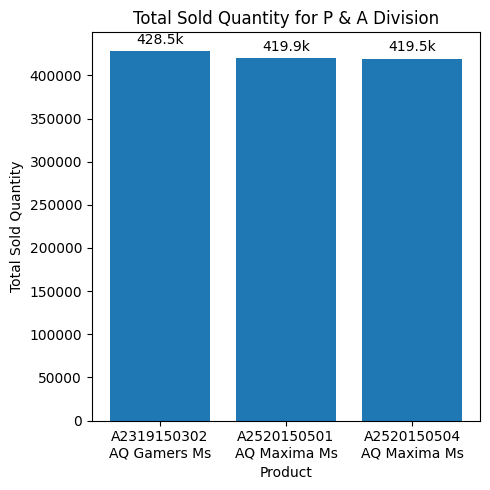

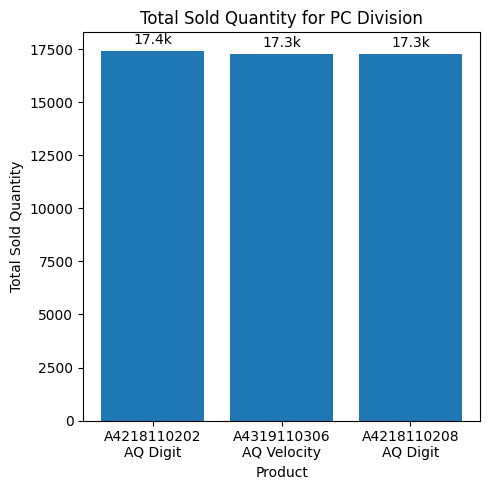

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('out10.csv')

# Create a combined label column for the x-axis with a newline character
df['product_label'] = df['product_code'] + '\n' + df['product']

# Get the unique divisions to create a graph for each
divisions = df['division'].unique()

# Loop through each unique division
for division in divisions:
    # Filter the DataFrame for the current division
    division_df = df[df['division'] == division]

    # Create a new bar chart for the division
    fig, ax = plt.subplots(figsize=(5, 5))
    bars = ax.bar(division_df['product_label'], division_df['total_sold_quantity'])
    ax.set_title(f'Total Sold Quantity for {division} Division')
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Sold Quantity')

    # Add data labels on top of each bar, formatted with 'k'
    for bar in bars:
        height = bar.get_height()
        formatted_height = f'{height / 1000:.1f}k'
        ax.annotate(
            formatted_height,
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords='offset points',
            ha='center',
            va='bottom',
        )
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()
    plt.show()